In [1]:
# Dependencies
import tweepy
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret


# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [8]:
# Target User
target_user = "realdonaldtrump"

# Create array to record all date-times of tweets
tweet_times = []

# Create a counter for viewing every 100 tweets
counter = 0

# Loop through 500 tweets
for x in range(1, 26):
    
    # Get all tweets from target user
    public_tweets = api.user_timeline(target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:
        
        # Store all tweet times into the array
        tweet_times.append(tweet["created_at"])
        
        counter += 1
        
        # Print tweets for preview
        if counter % 100 == 0:
            print(tweet["created_at"])

# Confirm tweet counts
len(tweet_times)

Thu Jun 28 18:57:22 +0000 2018
Fri Jun 22 11:06:30 +0000 2018
Thu Jun 14 15:09:21 +0000 2018
Tue Jun 05 13:55:59 +0000 2018
Sat May 26 19:56:52 +0000 2018


500

In [3]:
# Convert all tweet times into datetime objects
tweet_time_objects = []

# Add each datetime object into the array
for x in range(len(tweet_times)):
    tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
    tweet_time_objects.append(tweet_datetime)

    # Preview that datetimes are matching
    if x % 100 == 0:
        print(tweet_times[x])
        print(tweet_datetime)

Tue Jul 10 22:37:28 +0000 2018
2018-07-10 22:37:28+00:00
Thu Jun 28 13:06:01 +0000 2018
2018-06-28 13:06:01+00:00
Fri Jun 22 11:00:36 +0000 2018
2018-06-22 11:00:36+00:00
Thu Jun 14 15:09:12 +0000 2018
2018-06-14 15:09:12+00:00
Tue Jun 05 13:49:56 +0000 2018
2018-06-05 13:49:56+00:00


In [4]:
# Calculate the time between tweets
time_in_between = []

# Calculate the time in between each tweet
for x in range(len(tweet_time_objects)-1):
    hrs_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) / 3600
    time_in_between.append(hrs_apart)

# Hours Between Tweets
print(f"Avg. Hours Between Tweets: {np.mean(time_in_between)}")

Avg. Hours Between Tweets: 2.1215965263861056


In [5]:
time_in_between[:10]

[3.7519444444444443,
 0.16666666666666666,
 1.6808333333333334,
 2.203611111111111,
 0.15138888888888888,
 2.015,
 1.018888888888889,
 0.6444444444444445,
 0.25027777777777777,
 0.029444444444444443]

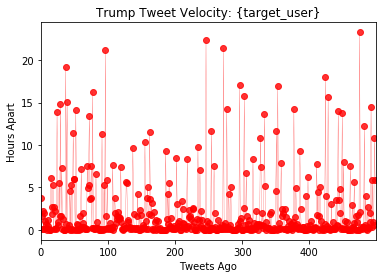

In [9]:
# Plot Time Between Tweets
plt.plot(range(len(time_in_between)), time_in_between, marker="o", 
               linewidth=0.25, alpha=0.8, color="r")
plt.xlim([0, len(time_in_between)])
plt.ylabel("Hours Apart")
plt.xlabel("Tweets Ago")
plt.title("Trump Tweet Velocity: {target_user}")
plt.show()